In [1]:
import configparser

In [2]:
import os.path as op

In [3]:
CP = configparser.ConfigParser()
CP.read_file(open(op.join(op.expanduser('~'), '.aws', 'credentials')))
CP.sections()
ak = CP.get('default', 'AWS_ACCESS_KEY_ID')
sk = CP.get('default', 'AWS_SECRET_ACCESS_KEY')

In [4]:
import numpy as np
import cottoncandy as cc

In [5]:
from tempfile import mkdtemp
import os.path as path

In [6]:
import sys 
sys.path.append('..')
import alpenglow.files as af
import matplotlib.pyplot as plt
%matplotlib inline
import skimage.external.tifffile as tiff
from skimage import transform
import numpy as np
import shutil as sh
import os
import boto3
from scipy import optimize
from imp import reload
import alpenglow.stitching as ast
import alpenglow.files as af

In [7]:
import skimage
from skimage.feature import register_translation
from skimage import img_as_float
from skimage import exposure
from skimage.io import imread_collection, ImageCollection
import skimage.external.tifffile as tif

In [8]:
from io import BytesIO

In [9]:
import dask.array as da
from dask import delayed

In [10]:
import time

In [11]:
file_list = ['/phantom_2_7_2017/%06d/%06d_%05d.tif'%(s, s, i) for s in range(3) for i in range(1, 1801) ]

In [12]:
f = file_list[0]

In [13]:
import tempfile

In [14]:
n_files = len(file_list)

In [15]:
files_per_strip = 1800
n_strips = 3

In [16]:
file_list = ['/phantom_2_7_2017/%06d/%06d_%05d.tif'%(s, s, i) for s in range(3) for i in range(1, 1801) ]

In [17]:
t1 = time.time()
cci = cc.get_interface('alpenglowoptics', 
                       ACCESS_KEY=ak, 
                       SECRET_KEY=sk,
                       endpoint_url='https://s3.amazonaws.com',
                       verbose=False)

sample = af.s3_to_array(file_list[0], cci)

stack = af.read_strip_files(file_list, files_per_strip, n_strips-1, cci, sample.dtype, sample.shape)
for ss in range(n_strips-2, 0, -1):
    stack = ast.stitch_zstack(
        stack, 
        af.read_strip_files(file_list, files_per_strip, ss, cci, sample.dtype, sample.shape))

t2 = time.time()
print(t2-t1)

385.22390151023865


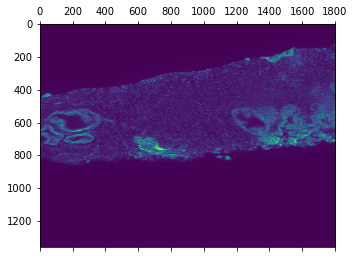

In [18]:
plt.matshow(stack[256])